Complete the exercises below For **Assignment #3**.

## Linear model with one numerical variable

Execute the following cell to load the [ISLR2](https://cran.rstudio.com/web/packages/ISLR2/index.html) and [Tidverse](https://www.tidyverse.org/) packages.

In [17]:
library('tidyverse')
library('ISLR2')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `ISLR2` package provides a dataset called `Boston` that we will use in this assignment.

In [18]:
Boston |> glimpse()

Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

🚨 Use the **Jupyter Lab Contextual Help Feature** to see the documentation for this data. 

❓ **In the markdown cell below, add definitions for the `lstat` and `medv` variables in the `Boston` data.** 

- `lstat`: Percentage of the population in a given neighborhood that belongs to the lower socioeconomic status group.
- `medv`: Median value of owner-occupied homes in $1000s

Let's plot `medv` (y-axis) versus `lstat`.


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston


The following object is masked from ‘package:dplyr’:

    select




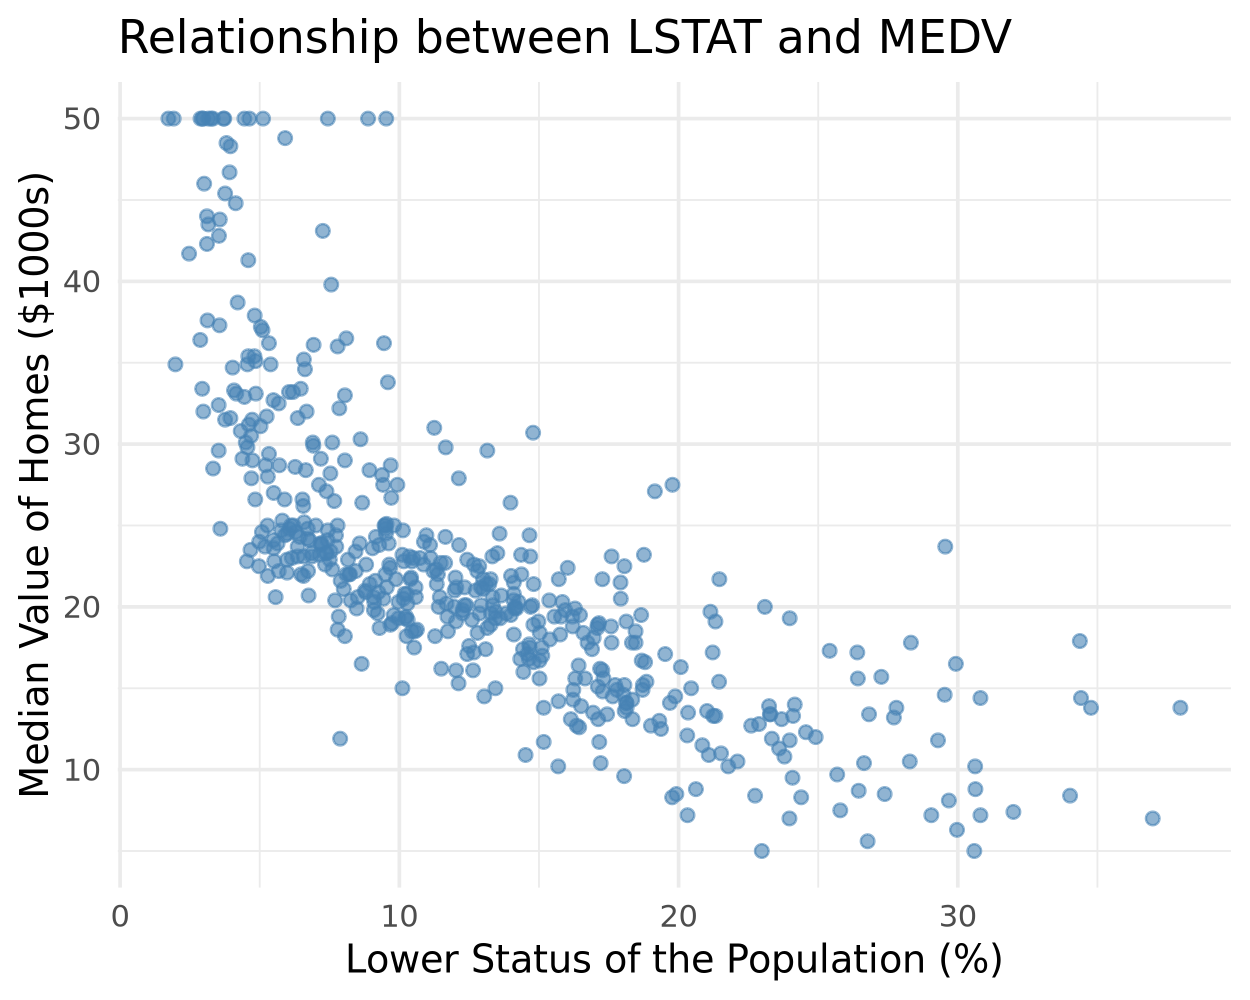

In [19]:
# Step 1: Load the MASS package
library(MASS)

# Step 2: Load the Boston dataset
data("Boston")

# Step 3: Now plot
library(ggplot2)

p <- ggplot(Boston, aes(x = lstat, y = medv)) +
  geom_point(color = "steelblue", alpha = 0.6) +
  labs(
    title = "Relationship between LSTAT and MEDV",
    x = "Lower Status of the Population (%)",
    y = "Median Value of Homes ($1000s)"
  ) +
  theme_minimal()

p

❓Does the relationship appear to be positive or negative? Does it look to be reasonably linear?

**Answer:**

The relationship is mostly linear, especially for moderate values of lstat. However, there is some curvature at higher lstat values (e.g., above 20), where medv levels off or drops more sharply — suggesting a non-linear component in the extreme range.

### Let's build a model!

We need to first load the [Tidymodels]() package.

In [20]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ dials        1.4.0     ✔ rsample      1.3.0
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ recipes      1.3.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ MASS::select()    masks dplyr::select()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



First we specify our model as `linear regression` using the `lm` engine.

In [21]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


Next we "fit" our model by supplying the `formula` and the data.

In [22]:
mod_fit = mod |> fit(medv ~ lstat, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ lstat, data = data)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


### Get the regression table

In [23]:
# We can use the tidy function to get a table of our model information
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.5538409,0.56262735,61.41515,3.743081e-236
lstat,-0.9500494,0.03873342,-24.52790,5.081103e-88


❓Comparing on the chart above and the regression table, does the **sign** of the `estimate` for the `lstat` term coefficient fit your expectations?

**Answer:**

The negative sign of the lstat coefficient matches expectations and aligns with the assumption that higher poverty correlates with lower home values.

### Making predictions and visualizing the model

We can use the `augment` function to "predict" `medv` for all the values in our original dataset. We will capture these predictions in a new data frame called `Boston2`. The predicted values are found in the `.pred` column.

In [24]:
Boston2 = augment(mod_fit, Boston)

glimpse(Boston2)

Rows: 506
Columns: 16
$ .pred   <dbl> 29.822595, 25.870390, 30.725142, 31.760696, 29.490078, 29.6040…
$ .resid  <dbl> -5.8225951, -4.2703898, 3.9748580, 1.6393042, 6.7099222, -0.90…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

Let's visualize our model.

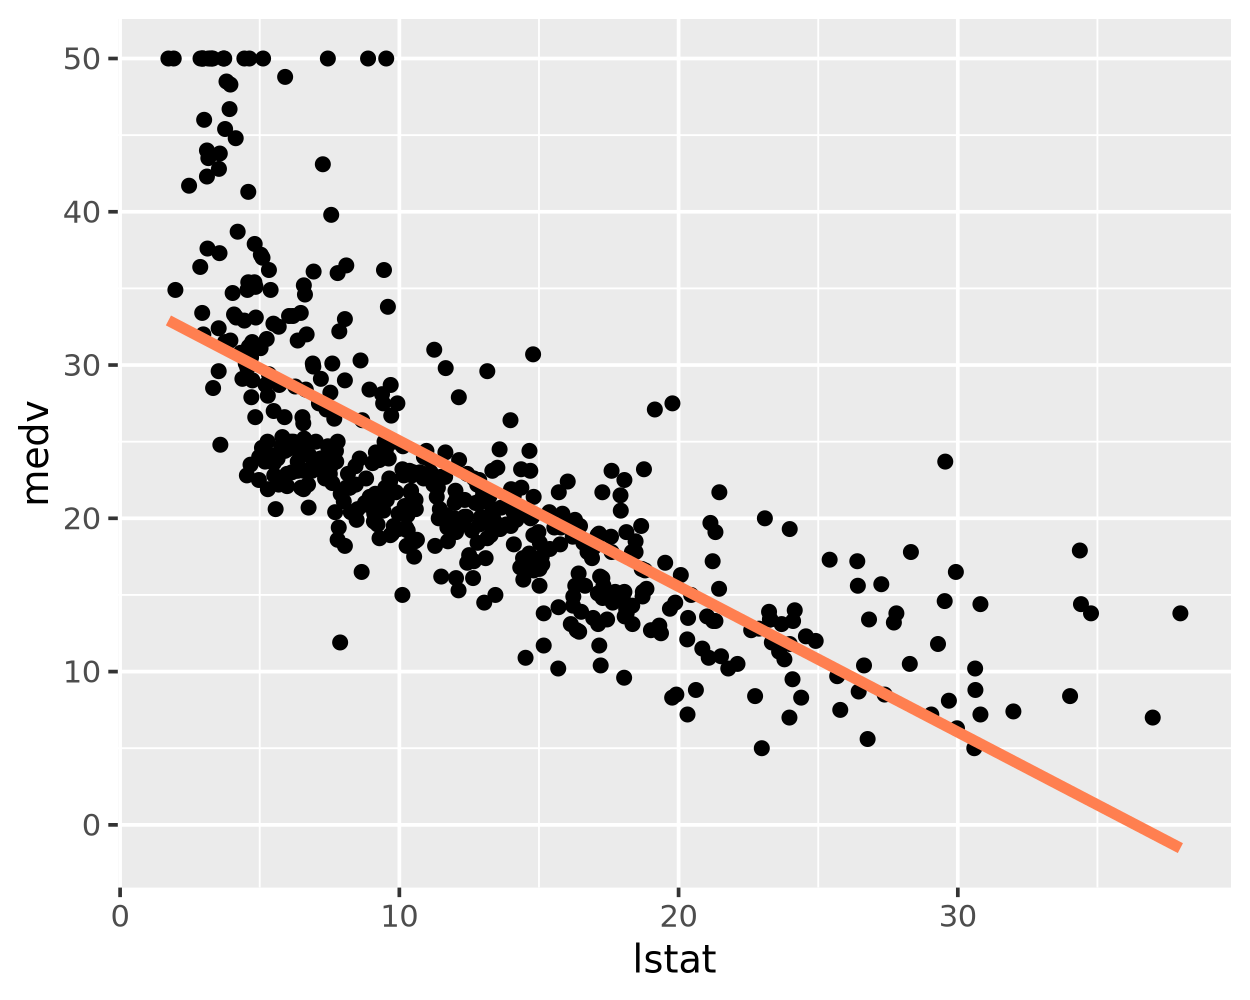

In [26]:
p = ggplot(Boston2, aes(x = lstat)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

### Put your skills to practice independently!

In cells below, build a model of `medv` with the `rm` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

In [27]:
install.packages(c("tidyverse", "broom", "MASS"), repos = "https://cloud.r-project.org")
library(tidyverse)   # includes ggplot2
library(broom)       # neat regression tables
library(MASS)        # for the Boston housing data

Warning message:
“package ‘MASS’ is not available for this version of R
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.4.0)
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.6)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [28]:
data("Boston")        # medv = target, rm = predictor
glimpse(Boston)       # quick sanity check

Rows: 506
Columns: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ lstat   <dbl> 4.

In [29]:
model <- lm(medv ~ rm, data = Boston)

In [30]:
tidy(model)           # coefficient-level stats
glance(model)         # model-level diagnostics (R², AIC, etc.)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-34.670621,2.6498030,-13.08423,6.950229e-34
rm,9.102109,0.4190266,21.72203,2.487229e-74


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.4835255,0.4825007,6.61616,471.8467,2.487229e-74,1,-1673.076,3352.151,3364.831,22061.88,504,506


`geom_smooth()` using formula = 'y ~ x'


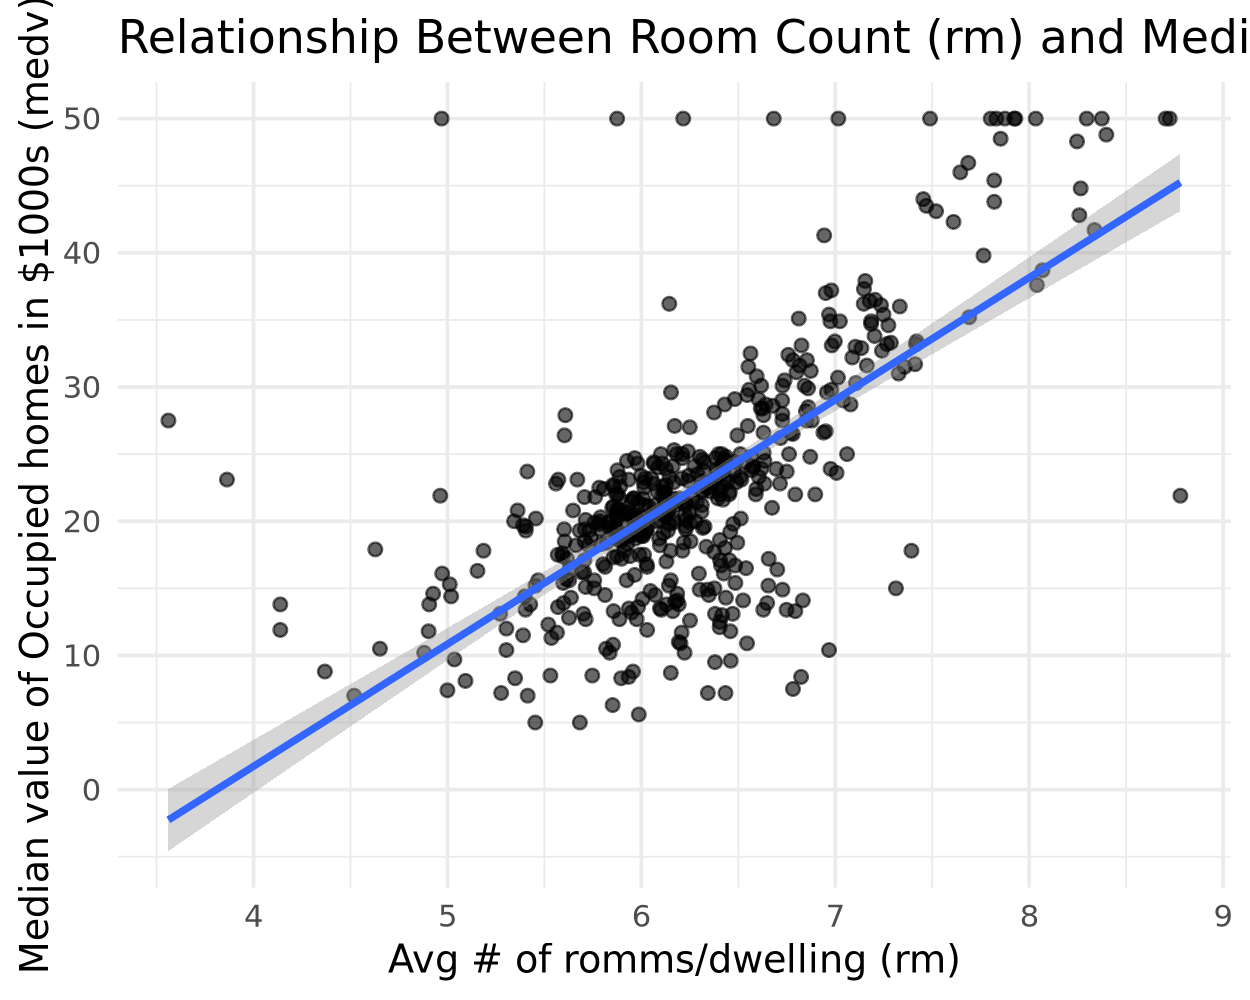

In [33]:
ggplot(Boston, aes(x = rm, y = medv)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(
    title = "Relationship Between Room Count (rm) and Median Home Value (medv)",
    x = "Avg # of romms/dwelling (rm)",
    y = "Median value of Occupied homes in $1000s (medv)"
  ) +
  theme_minimal()

❓Does your model indicate a positive relationship beteen number of rooms and home value? 

**Answer:**

The model indicates a positive relationship between the number of rooms (rm) and the median home value (medv). The coefficient for rm in the regression table will be positive, meaning that as the average number of rooms increases, the predicted median home value also increases.

## Linear model with one categorical variable

We will use the `Carseats` data from the `ISLR2` package for the following exercise.

In [34]:
Carseats |> glimpse()

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


Below is a plot of `sales` versus `ShelveLoc`.

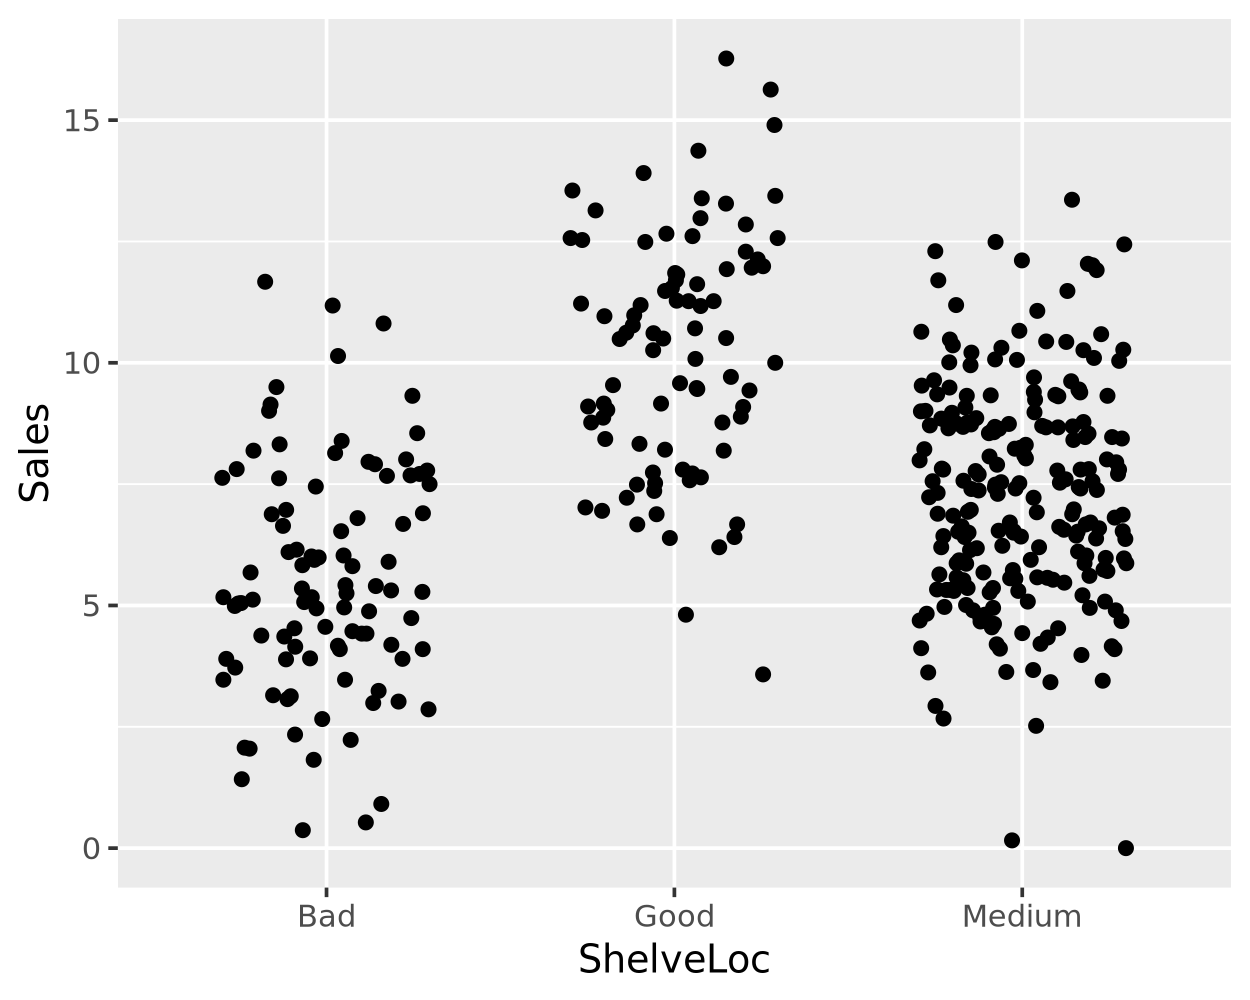

In [35]:
p = ggplot(Carseats, aes(x = ShelveLoc, y = Sales)) + 
    geom_point(position = position_jitter(width = 0.3, height = 0))

p

❓Does it look like a "Good" shelf location is associated with more car seat sales?

**Answer:**

Yes, a "Good" shelf location is clearly associated with higher car seat sales compared to "Medium" and especially "Bad".

In cells below, using the `Carseats` data build a model of `Sales` with the `ShelveLoc` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

📊 *Here is some example code for plotting your model.*

```r
# The code below assumes your predictions column is called ".pred" and is in a
# data frame called "Carseats2"

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

```

In [3]:
install.packages("ISLR")  # Only if not already installed
library(ISLR)
data(Carseats)  # This loads the dataset into the environment

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Build the model
model <- lm(Sales ~ ShelveLoc, data = Carseats)

# Show regression table
summary(model)


Call:
lm(formula = Sales ~ ShelveLoc, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3066 -1.6282 -0.0416  1.5666  6.1471 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.5229     0.2388  23.131  < 2e-16 ***
ShelveLocGood     4.6911     0.3484  13.464  < 2e-16 ***
ShelveLocMedium   1.7837     0.2864   6.229  1.2e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.339 on 397 degrees of freedom
Multiple R-squared:  0.3172,	Adjusted R-squared:  0.3138 
F-statistic: 92.23 on 2 and 397 DF,  p-value: < 2.2e-16


In [5]:
# Add predictions to the Carseats data
Carseats2 <- Carseats %>%
  mutate(.pred = predict(model, newdata = Carseats))

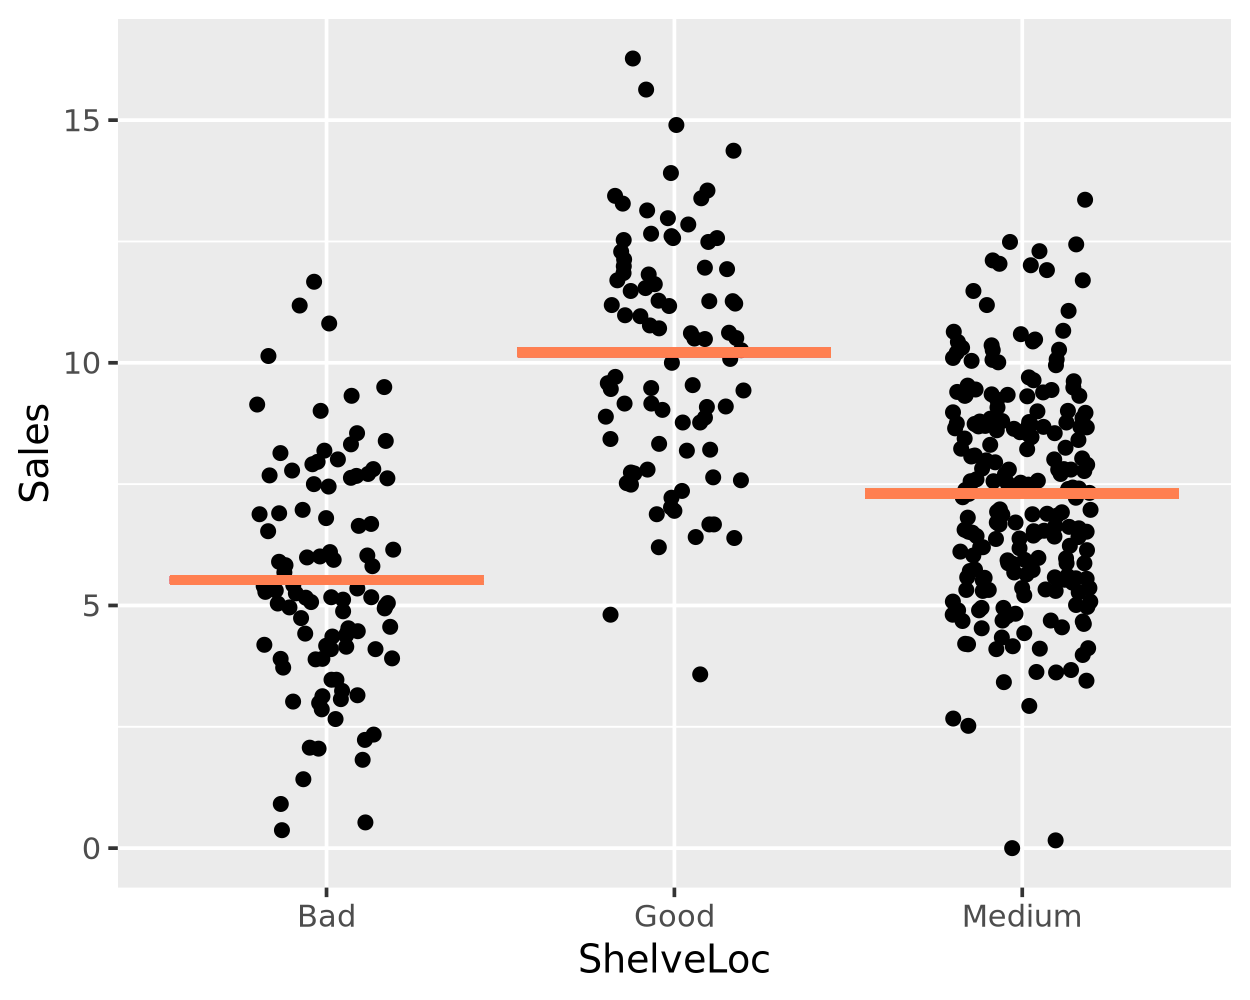

In [6]:
ggplot(Carseats2, aes(x = ShelveLoc)) + 
  geom_point(aes(y = Sales), 
             na.rm = TRUE, 
             position = position_jitter(height = 0, width = 0.2, seed = 42)) +
  geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                color = 'coral')

Which `ShelveLoc` category does your intercept term represent? 

**Answer:**

The intercept value in my regression output equals the predicted average Sales for stores with a "Bad" shelf location.